In [1]:
pip install tensorflow

In [2]:
import tensorflow as tf

In [3]:
# Import Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from bs4 import BeautifulSoup
from wordcloud import WordCloud
import re
import string
from textblob import TextBlob
import nltk
from nltk.corpus import stopwords
nltk.download('punkt')
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
nltk.download('wordnet')
from keras.preprocessing import sequence
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import *
from keras.layers import GRU, Dense, Embedding, Flatten, Dropout
from keras.activations import softmax
from sklearn.model_selection import train_test_split
# ignore warnings
import warnings
warnings.filterwarnings('ignore')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...


In [46]:
# Caminho para o arquivo CSV
file_path = '/content/text.csv'

# Carregar o arquivo CSV
df = pd.read_csv(file_path)


This dataset comprises text segments extracted from Twitter messages, each paired with a label indicating the predominant emotion conveyed. Emotions are categorized into six distinct classes: sadness (0), joy (1), love (2), anger (3), fear (4), and surprise (5). The dataset offers a diverse range of emotional expressions captured from real-world interactions on the Twitter platform, providing valuable insights into the spectrum of human emotions as expressed in online communication.

Key Features:
•	text: This feature contains a string representing the content of Twitter messages.
•	label: This classification label indicates the primary emotion expressed in the tweet, with values ranging from 0 to 5.



In [47]:
df.head()

,Unnamed: 0,text,label
0,0,i just feel really helpless and heavy hearted,4
1,1,ive enjoyed being able to slouch about relax a...,0
2,2,i gave up my internship with the dmrg and am f...,4
3,3,i dont know i feel so lost,0
4,4,i am a kindergarten teacher and i am thoroughl...,4


In [48]:
# Rename columns
df.rename(columns={'text': 'Text', 'label': 'Emotion'}, inplace=True)

df.head()


,Unnamed: 0,Text,Emotion
0,0,i just feel really helpless and heavy hearted,4
1,1,ive enjoyed being able to slouch about relax a...,0
2,2,i gave up my internship with the dmrg and am f...,4
3,3,i dont know i feel so lost,0
4,4,i am a kindergarten teacher and i am thoroughl...,4


In [49]:
df.shape

(416809, 3)

In [50]:
# Define a dictionary to map numerical labels to corresponding emotions
label_map = {
    0: 'Sadness',
    1: 'Joy',
    2: 'Love',
    3: 'Anger',
    4: 'Fear',
    5: 'Surprise'
}

# Replace numerical labels with corresponding emotions in the 'Emotion' column
df['Emotion'] = df['Emotion'].map(label_map)

In [51]:
df.head()
#drop unnucessary column
df.drop('Unnamed: 0', axis=1,inplace=True)

In [52]:
df.head()

,Text,Emotion
0,i just feel really helpless and heavy hearted,Fear
1,ive enjoyed being able to slouch about relax a...,Sadness
2,i gave up my internship with the dmrg and am f...,Fear
3,i dont know i feel so lost,Sadness
4,i am a kindergarten teacher and i am thoroughl...,Fear


1.	Calculate the count of each label:
•	The value_counts() function is applied to the 'Label' column of the DataFrame (df) to count the occurrences of each unique label


In [53]:
#calculate the count of each emotion
emotion_count =  df['Emotion'].value_counts()


This code snippet is for creating and displaying a bar chart using Python's matplotlib library.
1. plt.figure(figsize=(8,6)): This line creates a new figure for the plot with a specific size of 8 inches by 6 inches.

2. plt.bar(emotion_count.index, emotion_count.values): This line creates a bar chart. emotion_count.index represents the x-values (in this case, the emotions), and emotion_count.values represents the y-values (the count of each emotion). So, the bars will show the distribution of different emotions.

3. plt.title('Distribution of Emotions'): This line sets the title of the plot to "Distribution of Emotions".

4. plt.xlabel('Emotions'): This line sets the label for the x-axis to "Emotions".

5. plt.ylabel('Count'): This line sets the label for the y-axis to "Count".

6. plt.xticks(rotation=45): This line rotates the x-axis labels by 45 degrees to prevent overlapping if the labels are long.

7. plt.show(): This line displays the plot.

This code snippet is creating a bar chart to visualize the distribution of emotions, where each bar represents a different emotion, and the height of the bar represents the count of that emotion.

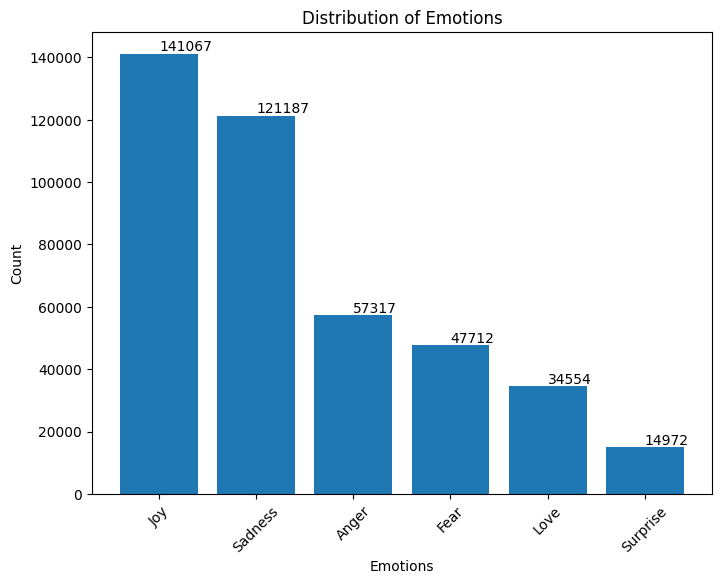

In [54]:
#then plotting in a barchart

plt.figure(figsize=(8,6))
bars = plt.bar(emotion_count.index, emotion_count.values)

plt.title('Distribution of Emotions')
plt.xlabel('Emotions')
plt.ylabel('Count')
plt.xticks(rotation=45)

# Adding labels with count on each bar
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval, round(yval, 2), va='bottom')

plt.show()

In [55]:
#reverse the emotions to numbers
label_mapping = {'Sadness':0,'Joy':1,'Love':2,'Anger':3,'Fear':4,'Surprise':5}

df['Emotion'] = df['Emotion'].replace(label_mapping)


•	df.head(): This command displays the first few rows of the DataFrame df after the specified preprocessing steps. It helps verify that the transformations have been applied correctly and gives a glimpse of the preprocessed data.


In [56]:
df.head()

,Text,Emotion
0,i just feel really helpless and heavy hearted,4
1,ive enjoyed being able to slouch about relax a...,0
2,i gave up my internship with the dmrg and am f...,4
3,i dont know i feel so lost,0
4,i am a kindergarten teacher and i am thoroughl...,4


Preprocessing
1.	Lowercasing:
•	df['Text'] = df['Text'].str.lower(): This line of code converts all the text in the 'Text' column of the DataFrame df to lowercase. It utilizes the str.lower() method to apply lowercase transformation to each element in the 'Text' column.
2.	Remove Extra White Spaces:
•	To remove extra white spaces, you can use functions like str.strip() to remove leading and trailing whitespaces or str.replace() with regex to replace consecutive whitespaces with a single space.
3.	Remove Punctuations:
•	Punctuations can be removed using str.replace() with regex to substitute punctuation characters with an empty string or using libraries like string to get a list of punctuation characters and then removing them from the text.



In [57]:
#text cleaning

df['Text'] = df['Text'].str.lower()
df['Text'] = df['Text'].str.strip()
string.punctuation
punctuation = string.punctuation
def remove_punctuation(text):
  return text.translate(str.maketrans('','',punctuation))
df['Text'] = df['Text'].apply(remove_punctuation)

df.head()

,Text,Emotion
0,i just feel really helpless and heavy hearted,4
1,ive enjoyed being able to slouch about relax a...,0
2,i gave up my internship with the dmrg and am f...,4
3,i dont know i feel so lost,0
4,i am a kindergarten teacher and i am thoroughl...,4


In [59]:
pip install langdetect

In [17]:
pip install googletrans

  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 55.1/55.1 kB 1.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.1/1.1 MB 9.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 133.4/133.4 kB 18.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 58.8/58.8 kB 8.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 42.6/42.6 kB 4.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 53.6/53.6 kB 7.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 65.0/65.0 kB 10.3 MB/s eta 0:00:00
  Created wheel for googletrans: filename=googletrans-3.0.0-py3-none-any.whl size=15718 sha256=0197910c83c9b68fbdd250eead8c86f395edd9b954684936e77cfdc391cf1688
  Stored in directory: /root/.cache/pip/wheels/b3/81/ea/8b030407f8ebfc2f857814e086bb22ca2d4fea1a7be63652ab
Successfully built googletrans
  Attempting uninstall: chardet
    Found existing installation: chardet 5.2.0
    Uninstalling cha

4.	Handling Acronyms:
•	Acronyms can be handled by maintaining a dictionary mapping the acronym to its expanded form and replacing occurrences of the acronym with its expanded form.

Explanation of the Code:
1.	Dictionary Definition:
•	The code defines a dictionary named acronyms which contains abbreviations commonly used in chat conversations along with their corresponding full forms.
2.	Function Definition:
•	The code defines a function named replace_acronyms(text).
Inside this function:
•	It takes a text input and splits it into individual words.
•	It iterates through each word and checks if the word (converted to lowercase) exists in the acronyms dictionary.
•	If a match is found, it replaces the word with its corresponding full form from the dictionary.
•	Finally, it joins all the words back together into a single string.
3.	Application of the Function:
•	The replace_acronyms function is then applied to the 'Text' column of a DataFrame named df using the apply() method.
•	This process replaces the chat abbreviations in each text entry of the 'Text' column with their full forms.
4.	Purpose:
•	This code segment is useful for text preprocessing tasks, particularly in scenarios where understanding the full meaning of text is important. By replacing chat abbreviations with their full forms, it enhances the readability and interpretability of the text data, making it suitable for various natural language processing (NLP) tasks such as sentiment analysis, text classification, and more.


In [60]:
# Define a dictionary of chat word mappings
acronyms = {
    "AFAIK": "As Far As I Know",
    "AFK": "Away From Keyboard",
    "ASAP": "As Soon As Possible",
    "ATK": "At The Keyboard",
    "ATM": "At The Moment",
    "A3": "Anytime, Anywhere, Anyplace",
    "BAK": "Back At Keyboard",
    "BBL": "Be Back Later",
    "BBS": "Be Back Soon",
    "BFN": "Bye For Now",
    "B4N": "Bye For Now",
    "BRB": "Be Right Back",
    "BRT": "Be Right There",
    "BTW": "By The Way",
    "B4": "Before",
    "B4N": "Bye For Now",
    "CU": "See You",
    "CUL8R": "See You Later",
    "CYA": "See You",
    "FAQ": "Frequently Asked Questions",
    "FC": "Fingers Crossed",
    "FWIW": "For What It's Worth",
    "FYI": "For Your Information",
    "GAL": "Get A Life",
    "GG": "Good Game",
    "GN": "Good Night",
    "GMTA": "Great Minds Think Alike",
    "GR8": "Great!",
    "G9": "Genius",
    "IC": "I See",
    "ICQ": "I Seek you (also a chat program)",
    "ILU": "ILU: I Love You",
    "IMHO": "In My Honest/Humble Opinion",
    "IMO": "In My Opinion",
    "IOW": "In Other Words",
    "IRL": "In Real Life",
    "KISS": "Keep It Simple, Stupid",
    "LDR": "Long Distance Relationship",
    "LMAO": "Laugh My A.. Off",
    "LOL": "Laughing Out Loud",
    "LTNS": "Long Time No See",
    "L8R": "Later",
    "MTE": "My Thoughts Exactly",
    "M8": "Mate",
    "NRN": "No Reply Necessary",
    "OIC": "Oh I See",
    "PITA": "Pain In The A..",
    "PRT": "Party",
    "PRW": "Parents Are Watching",
    "QPSA?": "Que Pasa?",
    "ROFL": "Rolling On The Floor Laughing",
    "ROFLOL": "Rolling On The Floor Laughing Out Loud",
    "ROTFLMAO": "Rolling On The Floor Laughing My A.. Off",
    "SK8": "Skate",
    "STATS": "Your sex and age",
    "ASL": "Age, Sex, Location",
    "THX": "Thank You",
    "TTFN": "Ta-Ta For Now!",
    "TTYL": "Talk To You Later",
    "U": "You",
    "U2": "You Too",
    "U4E": "Yours For Ever",
    "WB": "Welcome Back",
    "WTF": "What The F...",
    "WTG": "Way To Go!",
    "WUF": "Where Are You From?",
    "W8": "Wait...",
    "7K": "Sick:-D Laugher",
    "TFW": "That feeling when",
    "MFW": "My face when",
    "MRW": "My reaction when",
    "IFYP": "I feel your pain",
    "TNTL": "Trying not to laugh",
    "JK": "Just kidding",
    "IDC": "I don't care",
    "ILY": "I love you",
    "IMU": "I miss you",
    "ADIH": "Another day in hell",
    "ZZZ": "Sleeping, bored, tired",
    "WYWH": "Wish you were here",
    "TIME": "Tears in my eyes",
    "BAE": "Before anyone else",
    "FIMH": "Forever in my heart",
    "BSAAW": "Big smile and a wink",
    "BWL": "Bursting with laughter",
    "BFF": "Best friends forever",
    "CSL": "Can't stop laughing",
    "DIo": "Days Inventory Outstanding",
    "ive": "I have",
    "abl": "able",
    "uni": "universaty",
    "becuas": "because",
    "becua": "because",
}

In [61]:
# Function to replace chat words with their full phrases
def replace_acronyms(text):
    words = text.split()
    for i, word in enumerate(words):
        if word.lower() in acronyms:
            words[i] = acronyms[word.lower()]
    return ' '.join(words)

# Apply replace_chat_words function to 'Text' column
df['Text'] = df['Text'].apply(replace_acronyms)

This code utilizes two libraries, langdetect and googletrans, to translate text data to English. Here's a breakdown of the code:

Import Libraries: The code imports the necessary functions from the langdetect and googletrans libraries.

Define Translation Function: The translate_to_english function is defined to translate text to English. Within this function:

It first attempts to detect the language of the input text using the detect function from langdetect.
If the detected language is not English ('en'), it initializes a translator object from googletrans and translates the text from the detected language to English using the translate method.
If the language is already English, it returns the text as is.
If any exception occurs during language detection or translation, it returns the original text.
Apply Translation to DataFrame: The apply method is used on the 'Text' column of the DataFrame (df) to apply the translate_to_english function to each text entry, translating non-English text to English.

Display Translated DataFrame: The first few rows of the DataFrame (df) are displayed using the head method to show the translated text.

Overall, this code snippet detects the language of text data in a DataFrame column, translates non-English text to English, and updates the DataFrame with the translated text. If the language detection or translation fails for any reason, it retains the original text.

#function to make sure that every text is in english
from langdetect import detect
from googletrans import Translator
def translate_to_english(text):
  try:
    #detect the language of the text
    lang = detect(text)

    #if language is not English, traslate it to english
    if lang !='en':
      translator = Translator()
      translation = translator.translate(text, src=lang,dest='en')
      return translation.text
    else:
      return text #if is already in english
  except:
    return text #if the language detection fails

df['Text'] = df['Text'].apply(translate_to_english)

df.head()

Emojis:

Handling Emojis:
•	Emojis can be removed using libraries like emoji or regex patterns to identify and replace emojis with appropriate representations.

Explanation of the Code:
1.	emoji.demojize(text):
•	This function is part of the emoji library in Python.
•	It takes a string of text (text) as input and converts any emojis found in the text into their corresponding textual representation. For example, 😀 would be converted to ":grinning_face:".
2.	Function Definition - remove_emojis:
•	The code defines a function named remove_emojis that takes a string of text (text) as input.
•	Inside this function:
•	It applies emoji.demojize() to the input text, replacing emojis with their textual representations.
•	The modified text with emojis replaced is then returned by the function.
3.	Application of the Function:
•	The remove_emojis function is applied to the 'Text' column of a DataFrame df using the apply() method.
•	This ensures that each text entry in the 'Text' column has its emojis removed, making the text data more consistent and suitable for further analysis.
4.	Purpose:
•	Emojis can add expressive elements to text but may not always be relevant for text analysis tasks. By removing emojis and converting them into textual representations, the code aims to standardize the text data and eliminate potentially noisy elements. This can help improve the accuracy and effectiveness of subsequent text analysis algorithms, such as sentiment analysis or text classification



In [62]:
!pip install emoji


In [63]:
import emoji

In [64]:
# function to remove emojis from text
def remove_emojis(text):
  return emoji.demojize(text)

df['Text'] = df['Text'].apply(remove_emojis)

Stemming:
•	Stemming reduces words to their root form. It can be performed using libraries like NLTK, spaCy, or TextBlob, which provide stemming functionalities.

Code Working:
•	Initialization: The code initializes an instance of the Porter Stemmer by creating an object named porter_stemmer.
•	Stemming: Subsequently, stemming is applied to each text in the 'Text' column using a lambda function and the apply method. Within the lambda function:
•	Each text is split into individual words using the split() method.
•	For each word, stemming is applied using the stem() method of the Porter Stemmer.
•	The stemmed words are then rejoined into a single string using ' '.join().


In [65]:
from nltk.stem import PorterStemmer

# Initialize the Porter Stemmer
porter_stemmer = PorterStemmer()

# Apply stemming
df['Text'] = df['Text'].apply(lambda x: ' '.join([porter_stemmer.stem(word) for word in x.split()]))

In [69]:

df.head()

,Text,Emotion
0,i just feel realli helpless and heavi heart,4
1,i have enjoy be abl to slouch about relax and ...,0
2,i gave up my internship with the dmrg and am f...,4
3,i dont know i feel so lost,0
4,i am a kindergarten teacher and i am thoroughl...,4


In [70]:
print(df['Text'].values)
df.shape

['i just feel realli helpless and heavi heart'
 'i have enjoy be abl to slouch about relax and unwind and frankli need it after those last few week around the end of universati and the expo i have late start to find myself feel a bit listless which is never realli a good thing'
 'i gave up my internship with the dmrg and am feel distraught' ...
 'i feel veri curiou be whi previou earli dawn in the time here don t you seek hi troubl'
 'i feel that becuas of the tyran natur of the govern in el salvador and the savag social condit of the gener peopl that the set of thought to run the shoe shop in miguel marmol testimoney wa abl to work'
 'i think that after i had spent some time investig the surround and thing i start to feel more curiou about other peopl']


(416809, 2)

This code segment divides a dataset into training, validation, and testing sets for machine learning model training and evaluation:

Data Preparation:

x = df['Text']: Extracts the 'Text' column from the DataFrame df and assigns it to the variable x, representing the input data.
y = df['Emotion']: Extracts the 'Emotion' column from the DataFrame df and assigns it to the variable y, representing the target labels.
Data Splitting:

train_test_split: Splits the dataset into training, validation, and testing sets.
x_train_temp, x_test, y_train_temp, y_test: Splits x and y into a testing set (x_test, y_test) and a temporary training set (x_train_temp, y_train_temp), allocating 20% of the data for testing.
x_train, x_val, y_train, y_val: Further splits the temporary training set into a training set (x_train, y_train) and a validation set (x_val, y_val), allocating 25% of the data for validation.
Output Sizes:

Prints the lengths of the training, validation, and testing sets to the console, providing insights into the sizes of the respective datasets.
This code segment efficiently partitions the dataset into appropriate subsets for training, validation, and testing of machine learning models.







In [71]:
x = df['Text']
y = df['Emotion']

# Dividir os dados em conjuntos de treino, teste e validação
x_train_temp, x_test, y_train_temp, y_test = train_test_split(x, y, test_size=0.2, random_state=42)
x_train, x_val, y_train, y_val = train_test_split(x_train_temp, y_train_temp, test_size=0.25, random_state=42)  # Dividir novamente os dados de treino em treino e validação

# Verificar os tamanhos dos conjuntos de dados
print("Conjunto de Treino:", len(x_train))
print("Conjunto de Validação:", len(x_val))
print("Conjunto de Teste:", len(x_test))


Conjunto de Treino: 250085
Conjunto de Validação: 83362
Conjunto de Teste: 83362


Tokenization:
•	Tokenization involves converting textual data into numerical tokens, a crucial step in natural language processing (NLP).
•	The code initializes a Tokenizer object, specifying that only the top 50,000 most frequent words in the dataset will be considered during tokenization.
•	The fit_on_texts() method is invoked on the Tokenizer object with the training data x_train to build the vocabulary based on the words present in x_train.
•	Similarly, fit_on_texts() is called on the same Tokenizer object with the test data x_test to ensure consistency in tokenization.
•	tokenizer.document_count returns the total number of documents (sentences) processed by the tokenizer.


In [72]:
tokenizer = Tokenizer(num_words=50000)
tokenizer.fit_on_texts(x_train)
tokenizer.fit_on_texts(x_test)

In [73]:
tokenizer.document_count

333447

In [74]:
print(250085+83362)

333447


Conversion to Sequences:
•	texts_to_sequences() method is employed to convert each text in x_train and x_test to sequences of integers based on the tokenizer's vocabulary.
•	x_train_seq and x_test_seq now contain sequences of integers representing the words in the original texts.


In [75]:
x_train_seq = tokenizer.texts_to_sequences(x_train)
x_test_seq = tokenizer.texts_to_sequences(x_test)

Padding:
•	The maximum length of sequences in x_train_seq is determined using a list comprehension.
•	pad_sequences() function is then applied to both x_train_seq and x_test_seq to ensure all sequences have the same length (maxlen) by padding shorter sequences with zeros at the end (post-padding).
•	maxlen represents the maximum sequence length found in the training data.


In [76]:
maxlen = max(len(tokens) for tokens in x_train_seq)
print("Maximum sequence lenght (maxlen):",maxlen)

Maximum sequence lenght (maxlen): 178


In [77]:
x_train_pad = pad_sequences(x_train_seq, maxlen=maxlen,padding='post')
x_test_pad = pad_sequences(x_test_seq, maxlen= maxlen, padding='post')

In [78]:
print("x_train_pad:")
print(x_train_pad)
print(y_train)


print("\nx_test_pad:")
print(x_test_pad)
print(y_test)


x_test_pad.shape


x_train_pad:
[[  1  39   5 ...   0   0   0]
 [  1   2 505 ...   0   0   0]
 [  1   2 626 ...   0   0   0]
 ...
 [  1  12  49 ...   0   0   0]
 [  1 140  74 ...   0   0   0]
 [  1 140 125 ...   0   0   0]]
270569    0
366213    0
281565    2
18473     0
73496     1
         ..
249454    3
83726     0
250014    0
302782    0
360282    3
Name: Emotion, Length: 250085, dtype: int64

x_test_pad:
[[ 241   91  303 ...    0    0    0]
 [   1 1196    5 ...    0    0    0]
 [   1  328  394 ...    0    0    0]
 ...
 [   1   30  491 ...    0    0    0]
 [   1 1758   76 ...    0    0    0]
 [   1  185    2 ...    0    0    0]]
36130     0
138065    0
146440    3
103337    0
315528    1
         ..
7818      0
398821    1
235291    1
148780    3
409429    0
Name: Emotion, Length: 83362, dtype: int64


(83362, 178)

Vocabulary Size:
Code Explanation:
•	The expression set(token for sequence in x_train_pad for token in sequence) iterates over each sequence in the x_train_pad dataset and then iterates over each token (or word) in each sequence. It creates a set of unique tokens present in all sequences. Using a set ensures that each token is unique, eliminating duplicate tokens.
•	len(...) calculates the length of the set obtained in the previous step, which corresponds to the number of unique tokens in the entire training dataset.
•	vocabulary_size is a variable that stores the calculated length, representing the size of the vocabulary in the training dataset. In natural language processing, the vocabulary size refers to the total number of unique words (tokens) present in the dataset.


In [79]:
vocabulary_size = len(set(token for sequence in x_train_pad for token in sequence))
vocabulary_size

40311

Model Building:

Code Explanation:

Sequential: This initializes a sequential model, allowing you to build the model layer by layer in a linear fashion.

Embedding layer: Responsible for converting integer-encoded words into dense vectors of fixed size. It takes three parameters: input_dim, which specifies the size of the vocabulary (in this case, vocabulary_size), output_dim, determining the dimension of the dense embedding, and input_length, which specifies the length of input sequences (in this case, maxlen).

Bidirectional GRU layer: Adds a bidirectional Gated Recurrent Unit (GRU) layer with 128 units. GRU is a type of recurrent neural network (RNN) that is similar to LSTM but has fewer parameters. The bidirectional wrapper allows the GRU to process input sequences in both forward and backward directions, enhancing the model's ability to capture long-range dependencies in the data.

Batch normalization layer: Batch normalization is a technique used to improve the training speed and stability of neural networks by normalizing the activations of each layer. It helps mitigate the internal covariate shift problem.

Dropout regularization: Dropout is a regularization technique that randomly sets a fraction of input units to zero during training, which helps prevent overfitting by reducing the reliance on specific neurons.

Dense layer with ReLU activation: Adds a fully connected dense layer with 64 units and Rectified Linear Unit (ReLU) activation function. ReLU introduces non-linearity to the model, allowing it to learn complex patterns in the data.

Output layer with softmax activation: The final layer is a dense layer with 6 units (assuming there are 6 classes) and softmax activation function. Softmax activation normalizes the output vector into a probability distribution over the classes, making it suitable for multi-class classification problems.


In [80]:
from wordcloud import WordCloud
import string
from textblob import TextBlob
import nltk
from nltk.corpus import stopwords
nltk.download('punkt')
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
nltk.download('wordnet')
from keras.preprocessing import sequence
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import *
from keras.layers import GRU, Dense, Embedding, Flatten, Dropout
from keras.activations import softmax
from sklearn.model_selection import train_test_split


[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [81]:
from tensorflow.keras.models import Sequential

In [82]:
from keras.layers import GRU, Dense, Embedding, Flatten, Dropout
from keras.activations import softmax

In [83]:
model_1 = Sequential()

model_1.add(Embedding(input_dim=vocabulary_size, output_dim=100, input_length=maxlen))

model_1.add(Bidirectional(GRU(128)))

model_1.add(BatchNormalization())

model_1.add(Dropout(0.5))

model_1.add(Dense(64, activation='relu'))

model_1.add(Dropout(0.5))

model_1.add(Dense(6, activation='softmax'))


Compile The Model:
Code Explanation:
1.	Compiling the Model:
•	optimizer='adam': Specifies the optimization algorithm to be used during training. Adam is chosen here due to its efficiency and effectiveness in optimizing deep neural networks.
•	loss='sparse_categorical_crossentropy': Specifies the loss function to be optimized during training. Sparse categorical crossentropy is suitable for multi-class classification problems where the target labels are integers.
•	metrics=['accuracy']: Specifies the evaluation metric to be used during training and testing. Accuracy is chosen here to monitor the model's performance.
2.	Display The Model Summary:
•	This line prints a summary of the model architecture, providing details of each layer, including the layer type, output shape, and number of parameters. The summary offers a concise overview of the model's structure, facilitating understanding of its architecture and parameters.



In [84]:
model_1.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])



In [85]:
model_1.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_1 (Embedding)     (None, 178, 100)          4031100   
                                                                 
 bidirectional_1 (Bidirecti  (None, 256)               176640    
 onal)                                                           
                                                                 
 batch_normalization_1 (Bat  (None, 256)               1024      
 chNormalization)                                                
                                                                 
 dropout_2 (Dropout)         (None, 256)               0         
                                                                 
 dense_2 (Dense)             (None, 64)                16448     
                                                                 
 dropout_3 (Dropout)         (None, 64)               

In [86]:
print(x_train_pad.shape)
print(y_train.shape)
print(x_test_pad.shape)
print(y_test.shape)

print(x_train_pad.shape[0] + y_train.shape[0])
print(x_test_pad.shape[0] + y_test.shape[0])

print(x_train_pad.shape[0] + y_train.shape[0] + x_test_pad.shape[0] + y_test.shape[0])

(250085, 178)
(250085,)
(83362, 178)
(83362,)
500170
166724
666894


In [42]:
model_1

In [87]:
history_1 = model_1.fit(x_train_pad, y_train, epochs = 5, batch_size =128, validation_data=(x_test_pad,y_test))

Epoch 1/5
1954/1954 [==============================] - 92s 45ms/step - loss: 0.4133 - accuracy: 0.8444 - val_loss: 0.1714 - val_accuracy: 0.9160
Epoch 2/5
1954/1954 [==============================] - 52s 27ms/step - loss: 0.1707 - accuracy: 0.9178 - val_loss: 0.1972 - val_accuracy: 0.9142
Epoch 3/5
1954/1954 [==============================] - 51s 26ms/step - loss: 0.1492 - accuracy: 0.9231 - val_loss: 0.1539 - val_accuracy: 0.9227
Epoch 4/5
1954/1954 [==============================] - 49s 25ms/step - loss: 0.1366 - accuracy: 0.9272 - val_loss: 0.1372 - val_accuracy: 0.9243
Epoch 5/5
1954/1954 [==============================] - 55s 28ms/step - loss: 0.1277 - accuracy: 0.9302 - val_loss: 1.3898 - val_accuracy: 0.8447



From the provided plots of training and testing accuracy as well as training and testing loss over epochs, we can draw the following conclusions:

Accuracy Plot:

The blue line represents the training accuracy, showing how accurately the model predicts the training data over epochs.
The green line represents the testing accuracy, indicating the model's performance on unseen test data.
If both lines are increasing and converging, it suggests that the model is learning well from the training data and generalizing effectively to new data.
If the training accuracy continues to increase while the testing accuracy stagnates or decreases, it could indicate overfitting, where the model memorizes the training data too closely and fails to generalize.
If the testing accuracy is consistently lower than the training accuracy, it might suggest that the model is not generalizing well to new data.
Loss Plot:

The blue line corresponds to the training loss, which measures the error between the predicted and actual values on the training data.
The green line represents the validation (testing) loss, which assesses the model's performance on unseen validation data.
A decreasing trend in both lines indicates that the model is improving over epochs and reducing its error.
If the training loss decreases while the validation loss increases, it could indicate overfitting, as the model is becoming too specialized in the training data.
If the validation loss is consistently higher than the training loss, it suggests that the model is not generalizing well to new data.
In conclusion, these plots provide valuable insights into the performance and behavior of the model during training and testing phases. Adjustments to the model architecture, training parameters, or data preprocessing may be necessary based on the observed trends to improve model performance

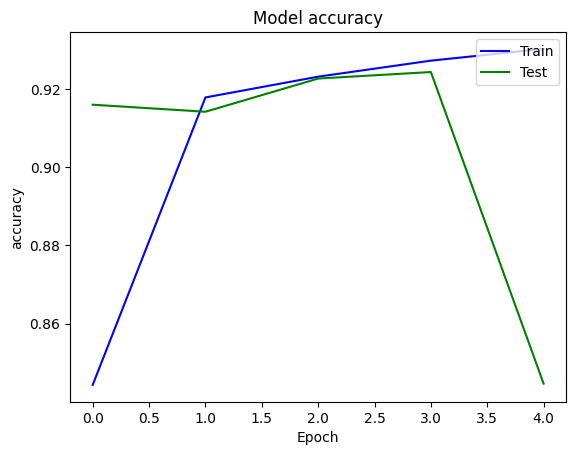

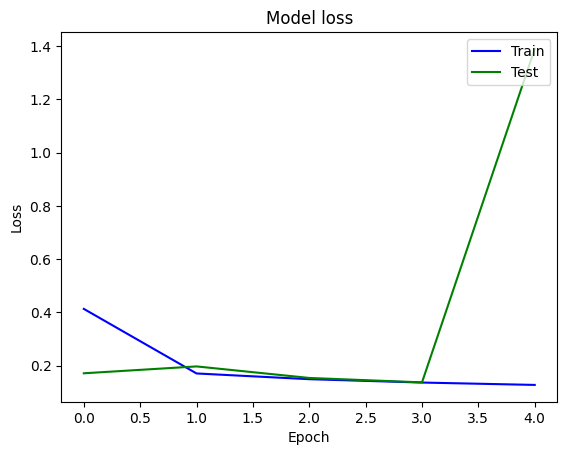

In [99]:
# Plotting the training and testing accuracy
plt.plot(history_1.history['accuracy'], color='blue')
plt.plot(history_1.history['val_accuracy'], color='green')
plt.title('Model accuracy')
plt.ylabel('accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper right')
plt.show()

# Plotting the training and testing loss
plt.plot(history_1.history['loss'],color='blue')
plt.plot(history_1.history['val_loss'],color='green')
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper right')
plt.show()

# The next code was ours first model, but after the presented results, we start to develop a better model (model_1).
This code segment performs text preprocessing, model construction, training, and evaluation for a binary classification task using a recurrent neural network (RNN) with Long Short-Term Memory (LSTM) units.
Build the Model:

The model architecture consists of an embedding layer, an LSTM layer, and a dense layer with a sigmoid activation function.
Embedding(vocab_size, 64, input_length=max_length): Embeds the input sequences into dense vectors of fixed size (64 dimensions).
LSTM(64): LSTM layer with 64 units.
Dense(1, activation='sigmoid'): Dense output layer with a sigmoid activation function for binary classification.
Compile the Model:

model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy']): Compiles the model with binary cross-entropy loss and the Adam optimizer, monitoring accuracy as the evaluation metric.
Model Summary:

model.summary(): Displays a summary of the model architecture, including the layer types, output shapes, and number of parameters.
Train the Model:

model.fit(X_train_pad, y_train, epochs=10, batch_size=64, validation_split=0.2): Trains the model on the training data for 10 epochs with a batch size of 64 and 20% of the data used for validation.
Evaluate the Model:

test_loss, test_acc = model.evaluate(X_test_pad, y_test): Evaluates the trained model on the testing data.
print("Acurácia do modelo no conjunto de teste:", test_acc): Prints the accuracy of the model on the testing dataset.

In [91]:

# Definir o tamanho máximo do vocabulário e o comprimento máximo da sequência
vocab_size = 10000
max_length = 100

# Inicializar o Tokenizer
tokenizer = Tokenizer(num_words=vocab_size)
tokenizer.fit_on_texts(x_train)

# Converter textos em sequências de tokens
X_train_seq = tokenizer.texts_to_sequences(x_train)
X_test_seq = tokenizer.texts_to_sequences(x_test)

# Padronizar sequências para o mesmo comprimento
X_train_pad = pad_sequences(X_train_seq, maxlen=max_length, padding='post')
X_test_pad = pad_sequences(X_test_seq, maxlen=max_length, padding='post')

# Construir o modelo
model = Sequential([
    Embedding(vocab_size, 64, input_length=max_length),
    LSTM(64),
    Dense(1, activation='sigmoid')

])

# Compilar o modelo
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

# Resumo do modelo
model.summary()

# Treinar o modelo
history = model.fit(X_train_pad, y_train, epochs=10, batch_size=64, validation_split=0.2)

# Avaliar o modelo no conjunto de teste
test_loss, test_acc = model.evaluate(X_test_pad, y_test)
print("Acurácia do modelo no conjunto de teste:", test_acc)


Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_2 (Embedding)     (None, 100, 64)           640000    
                                                                 
 lstm (LSTM)                 (None, 64)                33024     
                                                                 
 dense_4 (Dense)             (None, 1)                 65        
                                                                 
Total params: 673089 (2.57 MB)
Trainable params: 673089 (2.57 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________
Epoch 1/10
3127/3127 [==============================] - 60s 18ms/step - loss: -57.9169 - accuracy: 0.3386 - val_loss: -112.6053 - val_accuracy: 0.3392
Epoch 2/10
3127/3127 [==============================] - 31s 10ms/step - loss: -163.2630 - accuracy: 0.3386 - val_loss: -219.2172 - 

In [92]:

tokenizer.fit_on_texts(x_val)
x_val_seq = tokenizer.texts_to_sequences(x_val)
x_val_pad = pad_sequences(x_val_seq, maxlen=maxlen,padding='post')


Model validation with  the validation dataset (x_val_pad,y_val), to conform our model with unseen data by the model.

In [98]:
history_2 = model_1.fit(x_train_pad, y_train, epochs = 5, batch_size =128, validation_data=(x_val_pad,y_val))

Epoch 1/5
1954/1954 [==============================] - 49s 25ms/step - loss: 0.1085 - accuracy: 0.9376 - val_loss: 0.0993 - val_accuracy: 0.9389
Epoch 2/5
1954/1954 [==============================] - 50s 26ms/step - loss: 0.1023 - accuracy: 0.9396 - val_loss: 0.1202 - val_accuracy: 0.9402
Epoch 3/5
1954/1954 [==============================] - 50s 25ms/step - loss: 0.0985 - accuracy: 0.9403 - val_loss: 1.0778 - val_accuracy: 0.8706
Epoch 4/5
1954/1954 [==============================] - 49s 25ms/step - loss: 0.0965 - accuracy: 0.9413 - val_loss: 0.0885 - val_accuracy: 0.9429
Epoch 5/5
1954/1954 [==============================] - 50s 26ms/step - loss: 0.0942 - accuracy: 0.9425 - val_loss: 0.0842 - val_accuracy: 0.9454


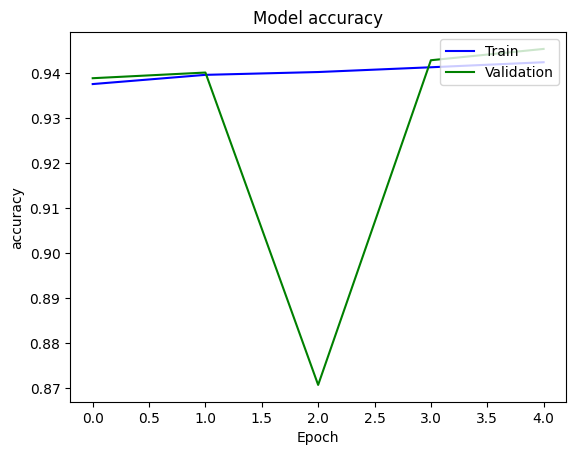

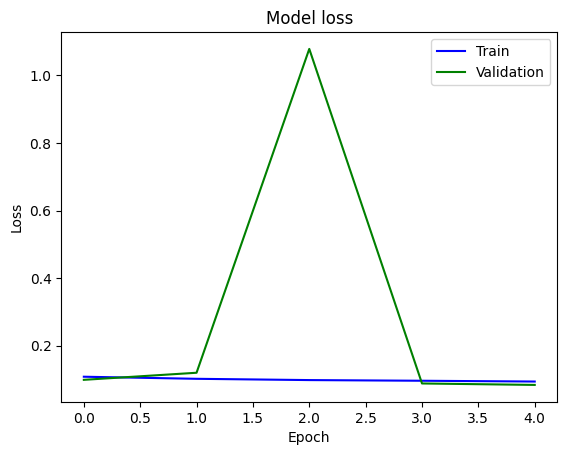

In [101]:
# Plotting the training and validation accuracy
plt.plot(history_2.history['accuracy'], color='blue')
plt.plot(history_2.history['val_accuracy'], color='green')
plt.title('Model accuracy')
plt.ylabel('accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper right')
plt.show()

# Plotting the training and validation loss
plt.plot(history_2.history['loss'],color='blue')
plt.plot(history_2.history['val_loss'],color='green')
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper right')
plt.show()